Inheritance & Composition in Python are two important concepts in Object Oriented programming that model the relation
between two classes

What to Expect by end of this notebook

- Use inheritance in Python

- Model class hierarchies using inheritance

- Use multiple inheritance in Python and understand its drawbacks

- Use composition to create complex objects

- Reuse existing code by applying composition

- Change application behavior at run-time through composition

In an inheritance relationship:

* Classes that inherit from another are called derived classes, subclasses, or subtypes.

* Classes from which other classes are derived are called base classes or super classes.

* A derived class is said to derive, inherit, or extend a base class.

* Inheritance models a **is a** relationship

### Derived class can replace the Base class in the application

**Liskov Substituition principle** states that “in a computer program, if S is a subtype of T, then objects of type T may be replaced with objects of type S without altering any of the desired properties of the program

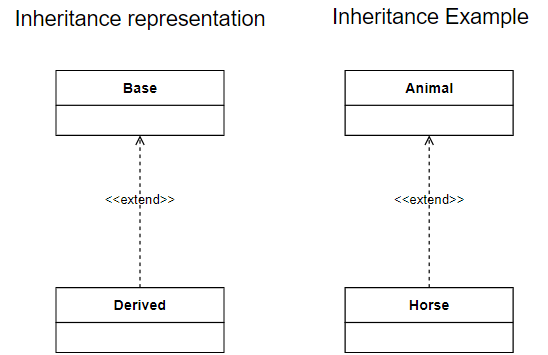

Composition is a concept that models a **has a** relationship. It enables creating complex types by combining objects of other types. This means that a class Composite can contain an object of another class Component. 

This relationship means that a Composite has a Component.

- Classes that contain objects of other classes are usually referred to as **composites**, 

- Classes that are used to create more complex types are referred to as **components**.

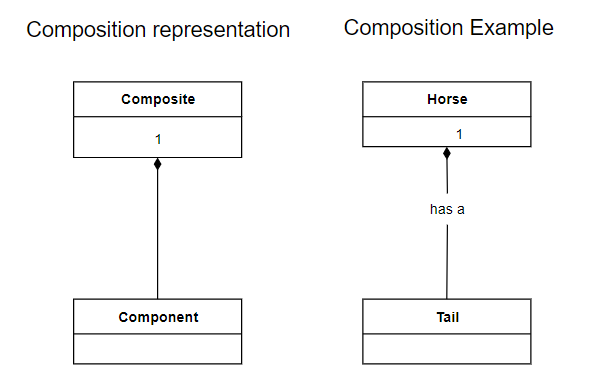

In [1]:
# Simplest possible class

class MyClass:
   pass

c = MyClass()

dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [2]:
# There are no members declared for MyClass, where are they coming from? Every python class implicitly derives from object.
o = object()
dir(o)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [4]:
# The exception to this rule are classes used to indicate errors by raising an exception.

class MyError:
    pass

raise MyError()

TypeError: exceptions must derive from BaseException

In [5]:
# BaseException is a base class provided for all error types. To create a new error type, you must derive your class from BaseException or one of its derived classes. The convention in Python is to derive your custom error types from Exception, which in turn derives from BaseException.

class MyError(Exception):
    pass

raise MyError()

MyError: 

### Creating Class Hierarchies

- Related class will have common interface defined in Base Class

- Derived class will specialize the interface, for a particular implementation

In [6]:
class PayrollSystem:
    def calculate_payroll(self, employees):
        print("calculating payroll")
        print("===================")
        for employee in employees:
            print(f"payroll for: {employee.id} - {employee.name}")
            # there is a calculate_payroll method in employee class
            print(f"- check amount: {employee.calculate_payroll()}")
            print("")

In [7]:
# implementing base Employee class

class Employee:
    def __init__(self, id, name):
        self.id = id
        self.name = name

# Employee just needs to have the id and name, at the very basic

In [8]:
# HR System requires that every Employee processed must have calculate_payroll() interface
# that returns weekly salary. Implementing interface depends on Employee type

class SalaryEmployee(Employee):
    def __init__(self, id, name, weekly_salary):
        # super() helps to initialize the parent class
        super().__init__(id, name)
        self.weekly_salary = weekly_salary

    def calculate_payroll(self):
        return self.weekly_salary

In [9]:
# There are manufacturing workers who are paid by the hour

class HourlyEmployee(Employee):
    def __init__(self, id, name, hours_worked, hour_salary):
        super().__init__(id, name)
        self.hours_worked = hours_worked
        self.hour_salary = hour_salary

    def calculate_payroll(self):
        return self.hour_salary * self.hours_worked

In [20]:
# There are associates who are paid fixed. Associate is a Salary Employee. 
# which means this Associate has to extend SalaryEmployee only


class AssociateEmployee(SalaryEmployee):
    def __init__(self, id, name, weekly_salary, commision):
        super().__init__(id, name, weekly_salary)
        self.commision = commision

    def calculate_payroll(self):
        # do the fixed salary as per the 
        fixed = super().calculate_payroll()
        # .calculate_payroll() leverages the implementation of the base class to retrieve the fixed salary and adds the commission value.
        return fixed + self.commision

Interfaces are represented similarly to classes with the word interface above the interface name. Interface names are usually prefixed with a capital I.

The derived classes implement the IPayrollCalculator interface, which is required by the PayrollSystem.

In [18]:
import logging

# create logger
logger = logging.getLogger('payroll')
# assign level info to logger
logger.setLevel(level=logging.INFO)
# create handler
streamer = logging.StreamHandler()
# setlevel for handler
streamer.setLevel(level=logging.ERROR)
# create formatter
stream_formater = logging.Formatter(fmt='%(name)s : %(levelname)s - %(message)s')
# attach formatter to handler
streamer.setFormatter(stream_formater)
# attach handler to logger
logger.addHandler(streamer)

In [21]:
salary_emp = SalaryEmployee(1, 'jane smith', 1588)
hourly_emp = HourlyEmployee(2, 'doe smith', 40, 15)
assoc_emp = AssociateEmployee(3, 'danny smith', 658, 579)

payroll_system = PayrollSystem()

try:
    payroll_system.calculate_payroll([
        salary_emp,
        hourly_emp,
        assoc_emp
    ])
except Exception as e:
    logger.exception("Something is amiss")

calculating payroll
payroll for: 1 - jane smith
- check amount: 1588

payroll for: 2 - doe smith
- check amount: 600

payroll for: 3 - danny smith
- check amount: 1237

